In [1]:
import os

import pandas as pd
import numpy as np

Establecemos una semilla para que nuestros experimentos sean reproducibles.

In [2]:
seed = 42

Leemos el csv generado a partir de las capas ráster.

In [3]:
csv_path = os.path.join('data', 'fires.csv')
df = pd.read_csv(csv_path)

In [4]:
df.sample(10, random_state=seed)

,elevacion,orientacion,altura,erodi,inflam,mcroth,slope,lfcc,anomalia,dpv,vel_media_viento,severidad_real,coord_x_etrs89,coord_y_etrs89,incendio,provincia
175125,606.047974,285.053741,3.0,2.0,3.0,4.0,4.097000,15.584400,67.784218,1.691194,2.156014,0.448692,378870.000000,4.456710e+06,Almorox,Toledo
66801,790.762024,78.863747,0.0,1.0,3.0,0.0,37.775002,3.331200,86.518700,2.363752,4.850470,0.247743,601140.000000,4.260840e+06,Talave,Albacete
5127,866.635010,270.244507,7.0,1.0,4.0,3.0,6.171000,35.249001,90.445862,2.008246,1.646938,0.283170,664224.843673,4.292922e+06,Almansa,Albacete
141323,1612.354980,318.737183,0.0,4.0,3.0,1.0,20.552000,0.000000,77.778488,2.440382,4.320680,0.301376,496650.000000,4.557600e+06,Bustares,Guadalajara
214826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.800400,1.128929,3.472492,0.136661,376650.000000,4.458600e+06,Cadalso,Toledo
166975,1041.090942,206.420959,3.0,4.0,2.0,3.0,9.552000,4.529600,73.554558,2.288264,2.930897,0.270713,487200.000000,4.535520e+06,Cogolludo,Guadalajara
151361,1257.797974,149.393280,1.0,4.0,3.0,1.0,3.731000,0.000000,76.075317,2.410218,4.327665,0.433782,496920.000000,4.554420e+06,Bustares,Guadalajara
106621,1413.628052,149.773773,13.0,1.0,3.0,2.0,33.714001,55.605400,52.458195,0.366200,2.445904,0.159852,554130.000000,4.253790e+06,Yeste,Albacete
73412,429.359009,357.348083,0.0,1.0,3.0,2.0,3.813000,0.000000,86.949562,2.388251,4.877640,0.175822,603990.000000,4.258740e+06,Talave,Albacete
85601,1201.379028,116.453354,11.0,1.0,3.0,2.0,19.256001,50.355297,51.932129,0.406200,2.463216,0.199727,558420.000000,4.257360e+06,Yeste,Albacete


In [5]:
df.describe()

,elevacion,orientacion,altura,erodi,inflam,mcroth,slope,lfcc,anomalia,dpv,vel_media_viento,severidad_real,coord_x_etrs89,coord_y_etrs89
count,207636.000000,207397.000000,207599.000000,207648.000000,207499.000000,207634.000000,207651.000000,207635.000000,235931.000000,235931.000000,235931.000000,236167.000000,236167.000000,2.361670e+05
mean,773.254387,166.666188,4.087351,2.159823,3.391915,2.547285,15.967753,18.015234,75.197600,1.920562,3.589924,0.377102,506498.310106,4.359562e+06
std,294.999980,96.383846,3.686283,1.201579,0.668354,0.978769,9.798667,20.552597,10.317871,0.879042,1.078943,0.174057,97247.399616,1.114629e+05
min,317.923004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.098625,0.227398,1.643635,0.100003,351660.000000,4.242150e+06
25%,534.277512,87.387611,1.000000,1.000000,3.000000,2.000000,8.179000,1.049000,73.408150,1.135522,2.649872,0.246755,405330.000000,4.254480e+06
50%,657.199005,163.749939,3.000000,2.000000,3.000000,3.000000,14.636000,10.561100,79.105545,2.284544,3.462977,0.348637,498060.000000,4.347390e+06
75%,996.428757,235.367004,6.000000,3.000000,4.000000,3.000000,21.885000,27.813200,80.024395,2.426604,4.874695,0.477527,606330.000000,4.459290e+06
max,1838.254028,359.999573,89.000000,4.000000,4.000000,4.000000,80.556999,100.000000,91.303085,3.446851,5.202462,1.185255,664916.631086,4.558950e+06


Todos los valores de altura que sean mayores que 30 se establecen a 0 ya que estos son errores en la medición y realmente no hay vegetación en esas zonas.

In [6]:
print(f'Observaciones con altura mayor que 30: {(df['altura'] > 30).sum()}')

Observaciones con altura mayor que 30: 26


In [7]:
df.loc[df['altura'] > 30, 'altura'] = 0

Se elimina cualquier fila que contenga datos nulos porque estos pertenecen a zonas que no son de Castilla-La Mancha (la mayoría se encuentran en el incendio de Cadalso, puesto que cubre parte de Castilla-La Mancha y parte de la Comunidad de Madrid).

In [8]:
df = df.dropna()
df.sample(5, random_state=seed)

,elevacion,orientacion,altura,erodi,inflam,mcroth,slope,lfcc,anomalia,dpv,vel_media_viento,severidad_real,coord_x_etrs89,coord_y_etrs89,incendio,provincia
57241,634.776001,250.032196,7.0,1.0,4.0,3.0,8.896000,13.816300,80.401657,1.638015,2.626458,0.365355,600330.0,4265520.0,Lietor,Albacete
167326,976.510010,25.008568,4.0,4.0,2.0,1.0,11.780000,25.855499,73.548317,2.282357,2.932048,0.251780,488970.0,4535400.0,Cogolludo,Guadalajara
32214,476.973999,160.423889,5.0,2.0,4.0,3.0,12.924000,6.557400,79.115219,2.430119,5.130743,0.260480,612210.0,4250010.0,Donceles,Albacete
171040,1024.077026,86.463524,1.0,4.0,2.0,3.0,15.490000,0.515500,73.393280,2.325590,2.946652,0.379164,486150.0,4532700.0,Cogolludo,Guadalajara
76101,466.989014,348.183472,9.0,1.0,4.0,2.0,16.677999,41.058800,87.130157,2.400360,4.888376,0.501093,605550.0,4257900.0,Talave,Albacete


Por otro lado, sabemos que un 0 en la variable erodi (discreta), significa que no hay datos, así que la vamos a tomar como valor perdido y a imputar por la moda.

In [9]:
print(f'Valores perdidos variable erodi: {(df['erodi'] == 0).sum()}')

Valores perdidos variable erodi: 5


In [10]:
erodi_mode = df.loc[df['erodi'] != 0, 'erodi'].mode()[0]
print(f'Moda de la variable erodi: {erodi_mode}')

Moda de la variable erodi: 1.0


In [11]:
df.loc[df['erodi'] == 0, 'erodi'] = erodi_mode

Transformamos la orientación, que está en grados, a dos nuevas columnas con su seno y su coseno, para poder representar la circularidad de esta variable.

In [12]:
df['orientacion_rad'] = np.deg2rad(df['orientacion'])
df['orientacion_sen'] = np.sin(df['orientacion_rad'])
df['orientacion_cos'] = np.cos(df['orientacion_rad'])
df.sample(5, random_state=seed)

,elevacion,orientacion,altura,erodi,inflam,mcroth,slope,lfcc,anomalia,dpv,vel_media_viento,severidad_real,coord_x_etrs89,coord_y_etrs89,incendio,provincia,orientacion_rad,orientacion_sen,orientacion_cos
57241,634.776001,250.032196,7.0,1.0,4.0,3.0,8.896000,13.816300,80.401657,1.638015,2.626458,0.365355,600330.0,4265520.0,Lietor,Albacete,4.363885,-0.939885,-0.341492
167326,976.510010,25.008568,4.0,4.0,2.0,1.0,11.780000,25.855499,73.548317,2.282357,2.932048,0.251780,488970.0,4535400.0,Cogolludo,Guadalajara,0.436482,0.422754,0.906245
32214,476.973999,160.423889,5.0,2.0,4.0,3.0,12.924000,6.557400,79.115219,2.430119,5.130743,0.260480,612210.0,4250010.0,Donceles,Albacete,2.799925,0.335059,-0.942197
171040,1024.077026,86.463524,1.0,4.0,2.0,3.0,15.490000,0.515500,73.393280,2.325590,2.946652,0.379164,486150.0,4532700.0,Cogolludo,Guadalajara,1.509073,0.998096,0.061684
76101,466.989014,348.183472,9.0,1.0,4.0,2.0,16.677999,41.058800,87.130157,2.400360,4.888376,0.501093,605550.0,4257900.0,Talave,Albacete,6.076948,-0.204778,0.978808


Creamos una nueva columna con las severidades discretizadas en las 4 clases con sus intervalos correspondientes.

In [13]:
def discretize_severities(severities):
    bins = [0.1, 0.27, 0.44, 0.66, 1.3]
    labels = [0, 1, 2, 3]
    result = pd.cut(severities, bins=bins, labels=labels, right=False)
    return result

In [14]:
df['severidad_discreta'] = discretize_severities(df['severidad_real'])
df.sample(5, random_state=seed)

,elevacion,orientacion,altura,erodi,inflam,mcroth,slope,lfcc,anomalia,dpv,vel_media_viento,severidad_real,coord_x_etrs89,coord_y_etrs89,incendio,provincia,orientacion_rad,orientacion_sen,orientacion_cos,severidad_discreta
57241,634.776001,250.032196,7.0,1.0,4.0,3.0,8.896000,13.816300,80.401657,1.638015,2.626458,0.365355,600330.0,4265520.0,Lietor,Albacete,4.363885,-0.939885,-0.341492,1
167326,976.510010,25.008568,4.0,4.0,2.0,1.0,11.780000,25.855499,73.548317,2.282357,2.932048,0.251780,488970.0,4535400.0,Cogolludo,Guadalajara,0.436482,0.422754,0.906245,0
32214,476.973999,160.423889,5.0,2.0,4.0,3.0,12.924000,6.557400,79.115219,2.430119,5.130743,0.260480,612210.0,4250010.0,Donceles,Albacete,2.799925,0.335059,-0.942197,0
171040,1024.077026,86.463524,1.0,4.0,2.0,3.0,15.490000,0.515500,73.393280,2.325590,2.946652,0.379164,486150.0,4532700.0,Cogolludo,Guadalajara,1.509073,0.998096,0.061684,1
76101,466.989014,348.183472,9.0,1.0,4.0,2.0,16.677999,41.058800,87.130157,2.400360,4.888376,0.501093,605550.0,4257900.0,Talave,Albacete,6.076948,-0.204778,0.978808,2


Borramos las variables que no nos hacen falta (orientacion y orientacion_rad) y las ordenamos para facilitar su visualización.

In [15]:
df = df.drop(columns=['orientacion', 'orientacion_rad'])
column_order = ['elevacion', 'erodi', 'slope', 'orientacion_sen', 'orientacion_cos', 
                'altura', 'lfcc', 'inflam', 'mcroth', 
                'anomalia', 'dpv', 'vel_media_viento', 
                'severidad_real', 'severidad_discreta',
                'coord_x_etrs89', 'coord_y_etrs89', 'incendio', 'provincia']
df = df.reindex(columns=column_order)
df.sample(5, random_state=seed)

,elevacion,erodi,slope,orientacion_sen,orientacion_cos,altura,lfcc,inflam,mcroth,anomalia,dpv,vel_media_viento,severidad_real,severidad_discreta,coord_x_etrs89,coord_y_etrs89,incendio,provincia
57241,634.776001,1.0,8.896000,-0.939885,-0.341492,7.0,13.816300,4.0,3.0,80.401657,1.638015,2.626458,0.365355,1,600330.0,4265520.0,Lietor,Albacete
167326,976.510010,4.0,11.780000,0.422754,0.906245,4.0,25.855499,2.0,1.0,73.548317,2.282357,2.932048,0.251780,0,488970.0,4535400.0,Cogolludo,Guadalajara
32214,476.973999,2.0,12.924000,0.335059,-0.942197,5.0,6.557400,4.0,3.0,79.115219,2.430119,5.130743,0.260480,0,612210.0,4250010.0,Donceles,Albacete
171040,1024.077026,4.0,15.490000,0.998096,0.061684,1.0,0.515500,2.0,3.0,73.393280,2.325590,2.946652,0.379164,1,486150.0,4532700.0,Cogolludo,Guadalajara
76101,466.989014,1.0,16.677999,-0.204778,0.978808,9.0,41.058800,4.0,2.0,87.130157,2.400360,4.888376,0.501093,2,605550.0,4257900.0,Talave,Albacete


Como sabemos que las variables erodi, inflam y mcroth son discretas y que van a tomar un valor entero entre 1 y 4, las convertiremos en tipo entero.

In [16]:
columns_types ={
                'erodi': 'Int64',
                'inflam': 'Int64',
                'mcroth': 'Int64'
            }

df = df.astype(columns_types)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207026 entries, 0 to 236166
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   elevacion           207026 non-null  float64 
 1   erodi               207026 non-null  Int64   
 2   slope               207026 non-null  float64 
 3   orientacion_sen     207026 non-null  float64 
 4   orientacion_cos     207026 non-null  float64 
 5   altura              207026 non-null  float64 
 6   lfcc                207026 non-null  float64 
 7   inflam              207026 non-null  Int64   
 8   mcroth              207026 non-null  Int64   
 9   anomalia            207026 non-null  float64 
 10  dpv                 207026 non-null  float64 
 11  vel_media_viento    207026 non-null  float64 
 12  severidad_real      207026 non-null  float64 
 13  severidad_discreta  207026 non-null  category
 14  coord_x_etrs89      207026 non-null  float64 
 15  coord_y_etrs89      20

In [18]:
df.sample(5, random_state=seed)

,elevacion,erodi,slope,orientacion_sen,orientacion_cos,altura,lfcc,inflam,mcroth,anomalia,dpv,vel_media_viento,severidad_real,severidad_discreta,coord_x_etrs89,coord_y_etrs89,incendio,provincia
57241,634.776001,1,8.896000,-0.939885,-0.341492,7.0,13.816300,4,3,80.401657,1.638015,2.626458,0.365355,1,600330.0,4265520.0,Lietor,Albacete
167326,976.510010,4,11.780000,0.422754,0.906245,4.0,25.855499,2,1,73.548317,2.282357,2.932048,0.251780,0,488970.0,4535400.0,Cogolludo,Guadalajara
32214,476.973999,2,12.924000,0.335059,-0.942197,5.0,6.557400,4,3,79.115219,2.430119,5.130743,0.260480,0,612210.0,4250010.0,Donceles,Albacete
171040,1024.077026,4,15.490000,0.998096,0.061684,1.0,0.515500,2,3,73.393280,2.325590,2.946652,0.379164,1,486150.0,4532700.0,Cogolludo,Guadalajara
76101,466.989014,1,16.677999,-0.204778,0.978808,9.0,41.058800,4,2,87.130157,2.400360,4.888376,0.501093,2,605550.0,4257900.0,Talave,Albacete


Guardamos este nuevo DataFrame para poder usarlo en cualquier momento sin tener que realizar todas las transformaciones de nuevo.

In [19]:
csv_path = os.path.join('data', 'fires_transformed.csv')
df.to_csv(csv_path, index=False)

In [20]:
df = pd.read_csv(csv_path)
df.sample(5, random_state=seed)

,elevacion,erodi,slope,orientacion_sen,orientacion_cos,altura,lfcc,inflam,mcroth,anomalia,dpv,vel_media_viento,severidad_real,severidad_discreta,coord_x_etrs89,coord_y_etrs89,incendio,provincia
56844,634.776001,1,8.896000,-0.939885,-0.341492,7.0,13.816300,4,3,80.401657,1.638015,2.626458,0.365355,1,600330.0,4265520.0,Lietor,Albacete
166929,976.510010,4,11.780000,0.422754,0.906245,4.0,25.855499,2,1,73.548317,2.282357,2.932048,0.251780,0,488970.0,4535400.0,Cogolludo,Guadalajara
31978,476.973999,2,12.924000,0.335059,-0.942197,5.0,6.557400,4,3,79.115219,2.430119,5.130743,0.260480,0,612210.0,4250010.0,Donceles,Albacete
170643,1024.077026,4,15.490000,0.998096,0.061684,1.0,0.515500,2,3,73.393280,2.325590,2.946652,0.379164,1,486150.0,4532700.0,Cogolludo,Guadalajara
75704,466.989014,1,16.677999,-0.204778,0.978808,9.0,41.058800,4,2,87.130157,2.400360,4.888376,0.501093,2,605550.0,4257900.0,Talave,Albacete


# Análisis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
csv_path = os.path.join('data', 'fires_transformed.csv')
df = pd.read_csv(csv_path)
df.sample(5, random_state=seed)

,elevacion,erodi,slope,orientacion_sen,orientacion_cos,altura,lfcc,inflam,mcroth,anomalia,dpv,vel_media_viento,severidad_real,severidad_discreta,coord_x_etrs89,coord_y_etrs89,incendio,provincia
56844,634.776001,1,8.896000,-0.939885,-0.341492,7.0,13.816300,4,3,80.401657,1.638015,2.626458,0.365355,1,600330.0,4265520.0,Lietor,Albacete
166929,976.510010,4,11.780000,0.422754,0.906245,4.0,25.855499,2,1,73.548317,2.282357,2.932048,0.251780,0,488970.0,4535400.0,Cogolludo,Guadalajara
31978,476.973999,2,12.924000,0.335059,-0.942197,5.0,6.557400,4,3,79.115219,2.430119,5.130743,0.260480,0,612210.0,4250010.0,Donceles,Albacete
170643,1024.077026,4,15.490000,0.998096,0.061684,1.0,0.515500,2,3,73.393280,2.325590,2.946652,0.379164,1,486150.0,4532700.0,Cogolludo,Guadalajara
75704,466.989014,1,16.677999,-0.204778,0.978808,9.0,41.058800,4,2,87.130157,2.400360,4.888376,0.501093,2,605550.0,4257900.0,Talave,Albacete


In [23]:
numerical_variables = ['elevacion', 'slope', 'orientacion_sen', 'orientacion_cos', 'altura', 'lfcc', 'anomalia', 'dpv', 'vel_media_viento']
categorical_variables = ['erodi', 'inflam', 'mcroth']
variables = numerical_variables + categorical_variables
target_real = 'severidad_real'
target_discrete = 'severidad_discreta'

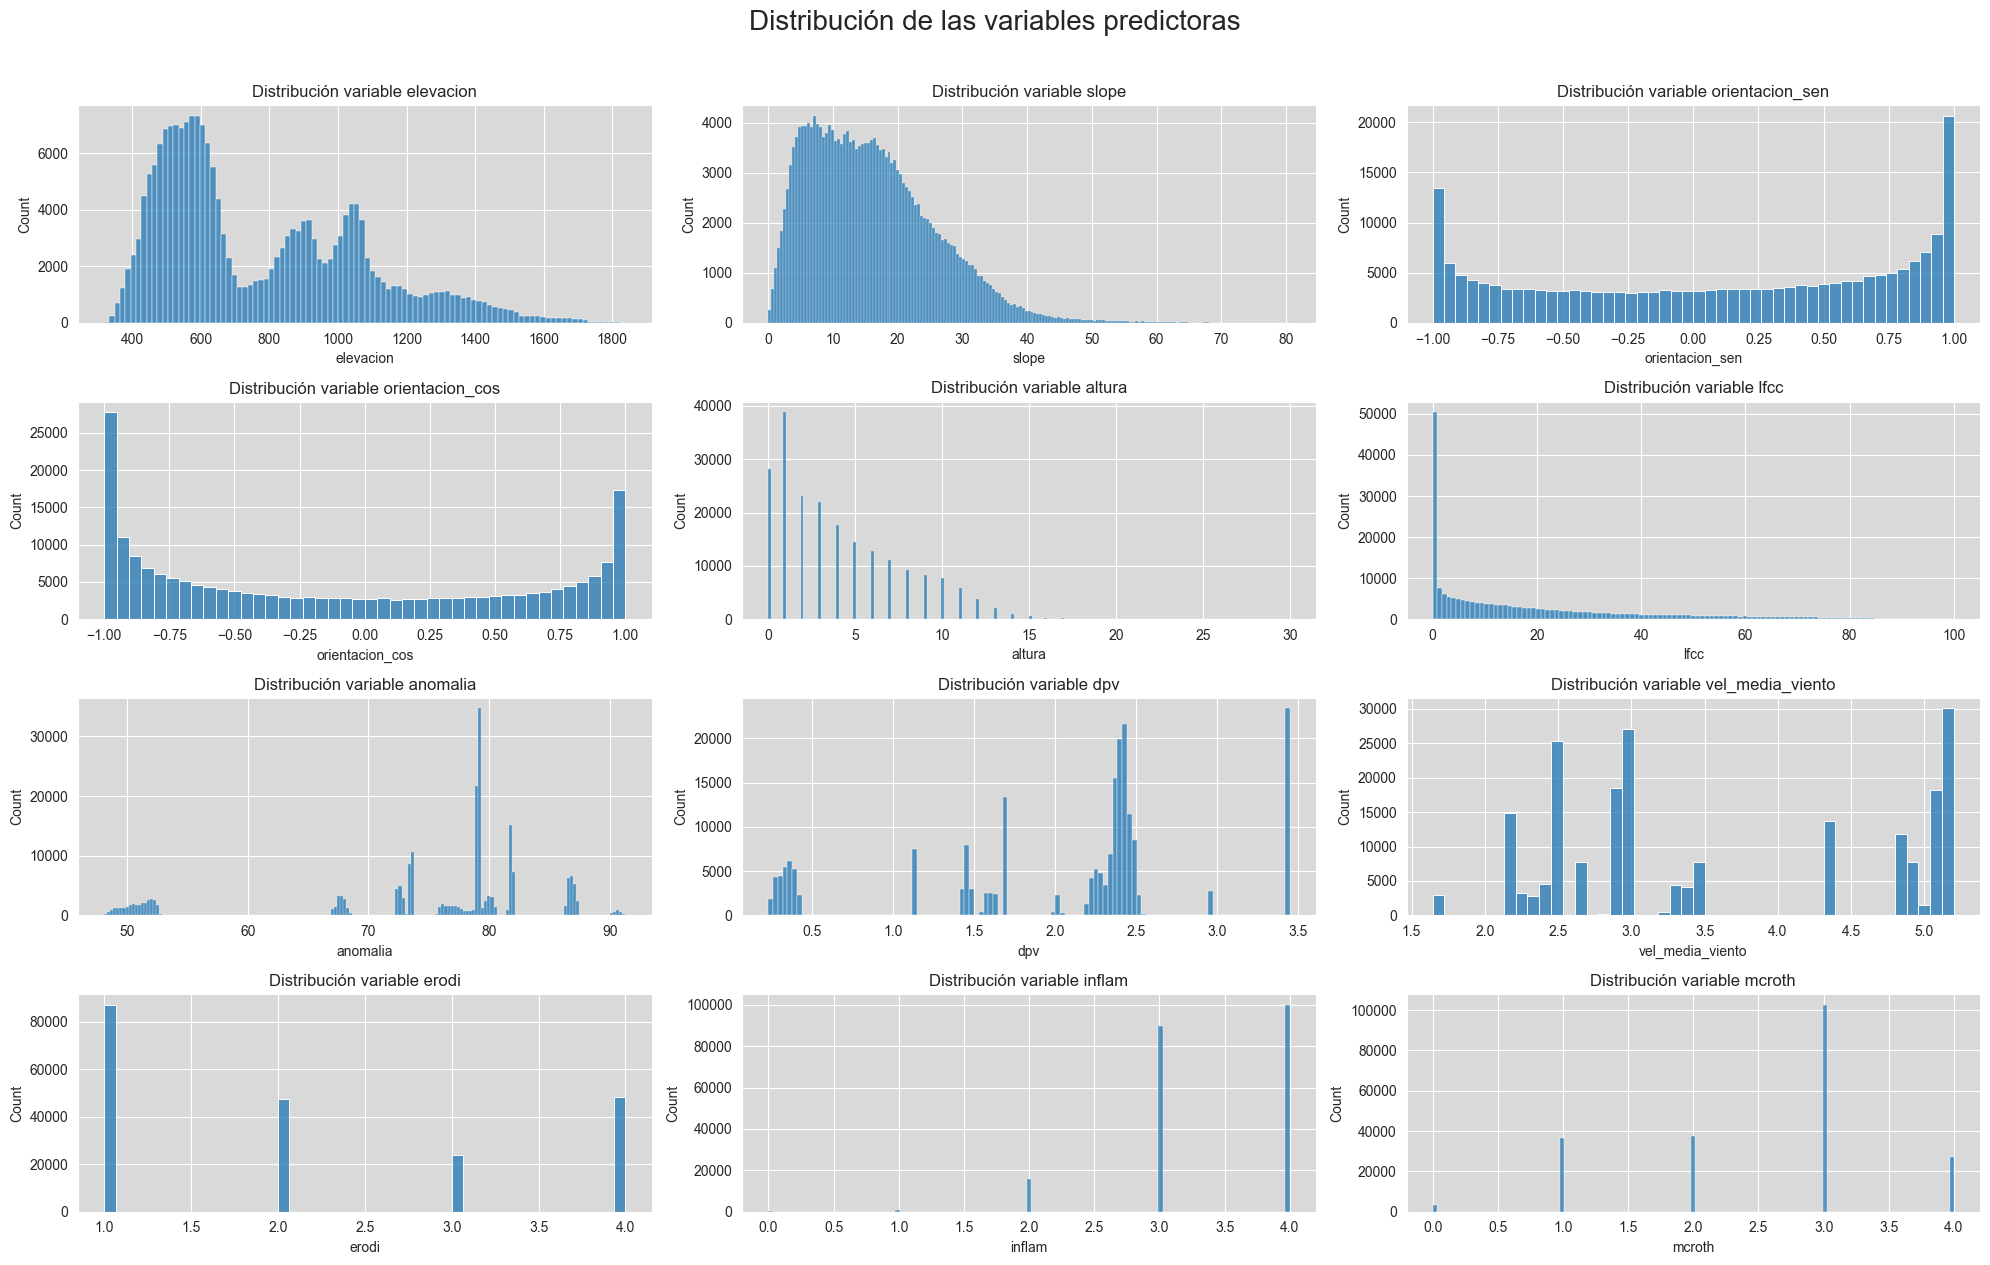

In [24]:
sns.set_style("darkgrid", {"axes.facecolor": ".85"})
nrows, ncols = 4, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 3*nrows))
for index, var in enumerate(variables):
    row = index // ncols
    column = index % ncols
    im = sns.histplot(data=df, x=var, ax=axs[row][column])
    axs[row][column].set_xlabel(var)
    axs[row][column].set_title(f'Distribución variable {var}')

plt.tight_layout()
plt.suptitle('Distribución de las variables predictoras', fontsize=20, y=1.05)

plt.show()

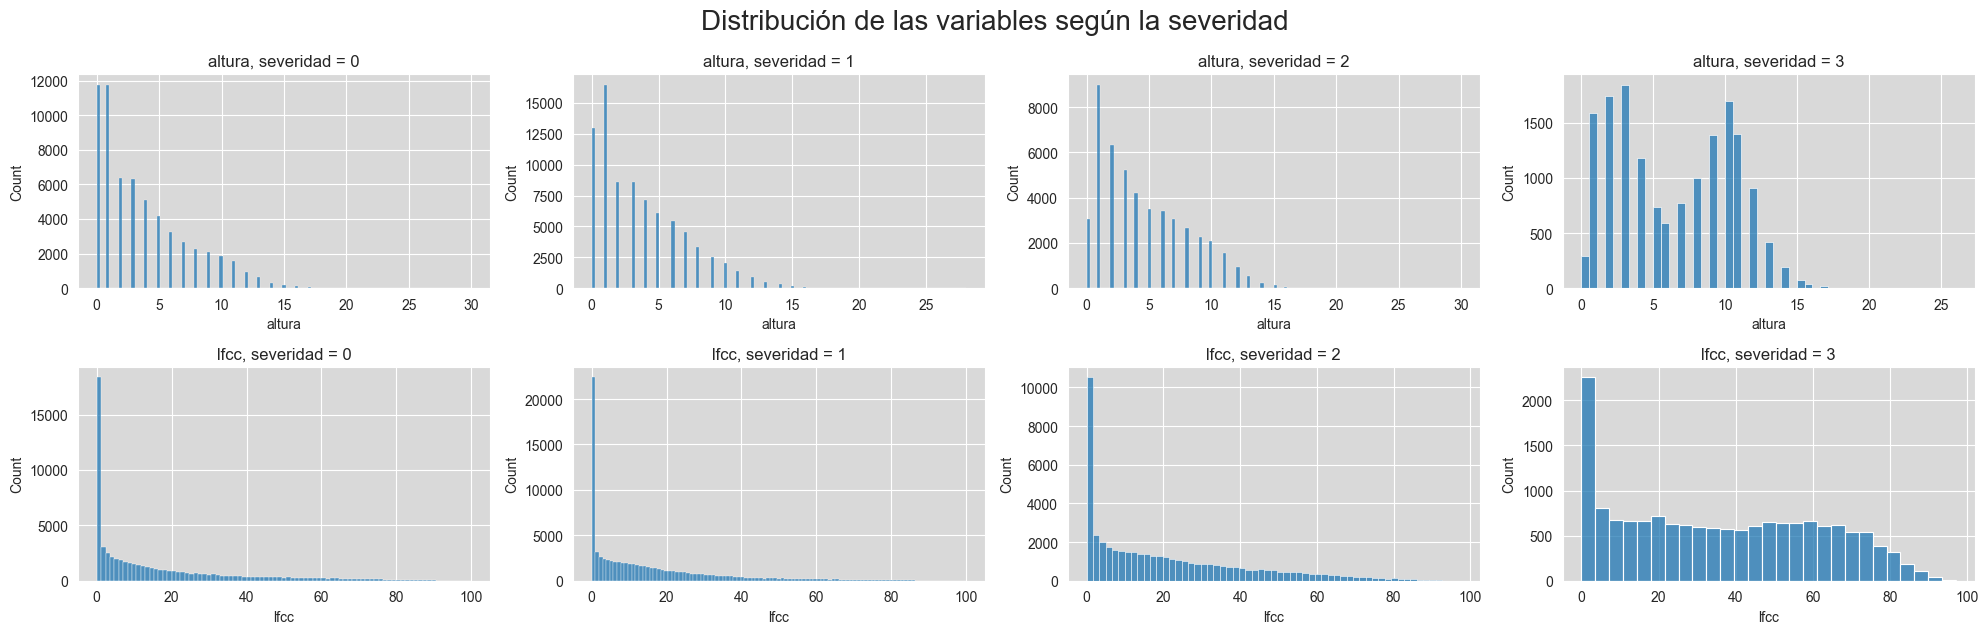

In [25]:
sns.set_style("darkgrid", {"axes.facecolor": ".85"})
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 3*nrows))
for row, var in enumerate(['altura', 'lfcc']):
    for column in range(4):
        data = df.loc[df[target_discrete]==column, var]
        im = sns.histplot(data=data, ax=axs[row][column])
        axs[row][column].set_xlabel(var)
        axs[row][column].set_title(f'{var}, severidad = {column}')

plt.tight_layout()
plt.suptitle('Distribución de las variables según la severidad', fontsize=20, y=1.05)

plt.show()

Se eliminan todas las filas que contengan un 0 en una de las columnas relacionadas con la vegetación (altura, inflam, mcroth y lfcc) ya que esto significa que no hay datos de vegetación y se asume que en esa zona no podría producirse un incendio, por lo tanto, esto nos generaría ruido.

In [26]:
df = df.loc[(df['altura'] != 0) & (df['inflam'] != 0) & (df['mcroth'] != 0) & (df['lfcc'] != 0)]
csv_path = os.path.join('data', 'fires_transformed.csv')
df.to_csv(csv_path, index=False)

In [27]:
df = pd.read_csv(csv_path)
df.sample(10, random_state=seed)

,elevacion,erodi,slope,orientacion_sen,orientacion_cos,altura,lfcc,inflam,mcroth,anomalia,dpv,vel_media_viento,severidad_real,severidad_discreta,coord_x_etrs89,coord_y_etrs89,incendio,provincia
119340,1024.904053,4,15.177,0.994650,0.103298,9.0,46.956501,3,2,73.561211,2.246882,2.916394,0.845614,3,490110.0,4538190.0,Cogolludo,Guadalajara
58023,505.352997,1,25.718,0.206331,0.978482,3.0,19.892401,4,3,86.961823,2.385298,4.876472,0.270908,1,604950.0,4257480.0,Talave,Albacete
46997,388.710999,2,31.593,-0.984000,0.178167,1.0,0.956900,4,3,79.168137,2.319516,5.026659,0.412787,1,617730.0,4243860.0,Donceles,Albacete
67214,1063.177002,1,22.364,0.901304,-0.433188,2.0,7.424201,4,1,50.321835,0.349119,2.470344,0.576249,2,561090.0,4256790.0,Yeste,Albacete
153590,507.516998,3,13.911,0.872081,0.489362,3.0,32.275799,4,3,72.893860,1.469779,3.393716,0.310006,1,407340.0,4412550.0,Montesion,Toledo
81934,923.658020,1,31.045,0.871626,-0.490171,12.0,56.506199,3,2,51.595585,0.333367,2.453083,0.717993,3,556230.0,4254060.0,Yeste,Albacete
104367,930.512024,4,21.000,0.452970,0.891526,4.0,34.572498,4,4,81.995255,3.436369,3.007598,0.238637,0,407400.0,4347090.0,Malagon,Ciudad Real
152122,534.270996,3,12.897,0.999470,0.032561,3.0,26.368200,4,1,72.654236,1.451741,3.333315,0.392714,1,404910.0,4412910.0,Montesion,Toledo
116851,1022.421997,4,13.746,0.681055,0.732232,1.0,0.604200,3,1,73.504234,2.226376,2.908183,0.434948,1,491310.0,4539660.0,Cogolludo,Guadalajara
67452,1051.255005,1,12.512,0.166430,0.986053,2.0,19.039101,4,1,50.225742,0.345670,2.470613,0.338407,1,561210.0,4256730.0,Yeste,Albacete


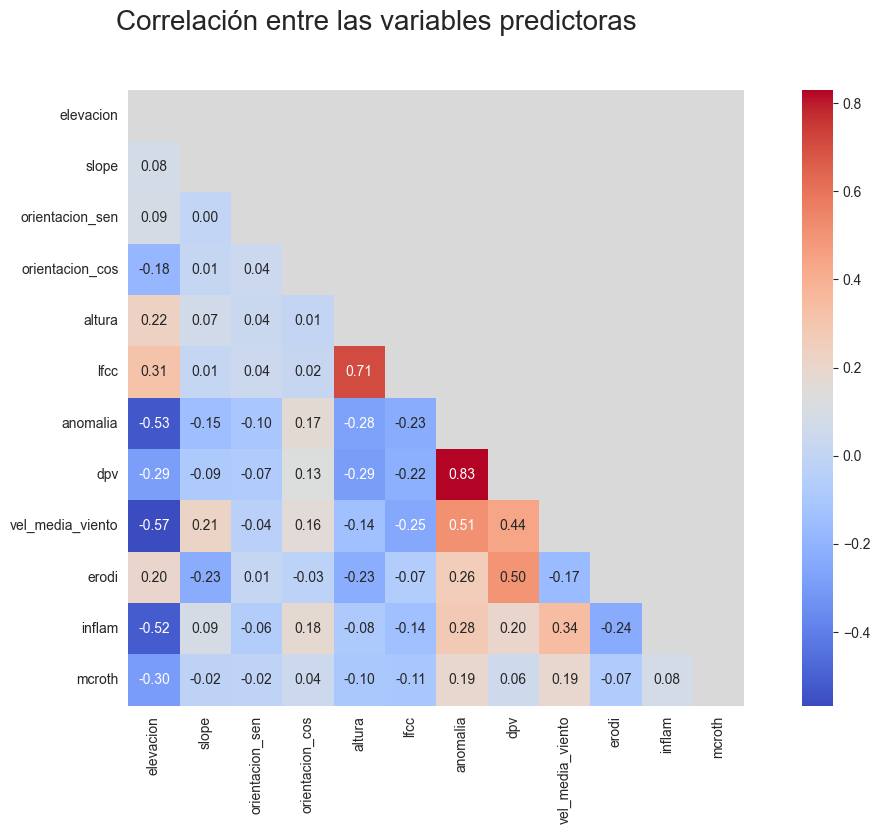

In [28]:
sns.set_style("dark", {"axes.facecolor": ".85"})
corr = df[variables].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.suptitle('Correlación entre las variables predictoras', fontsize=20)
plt.show()

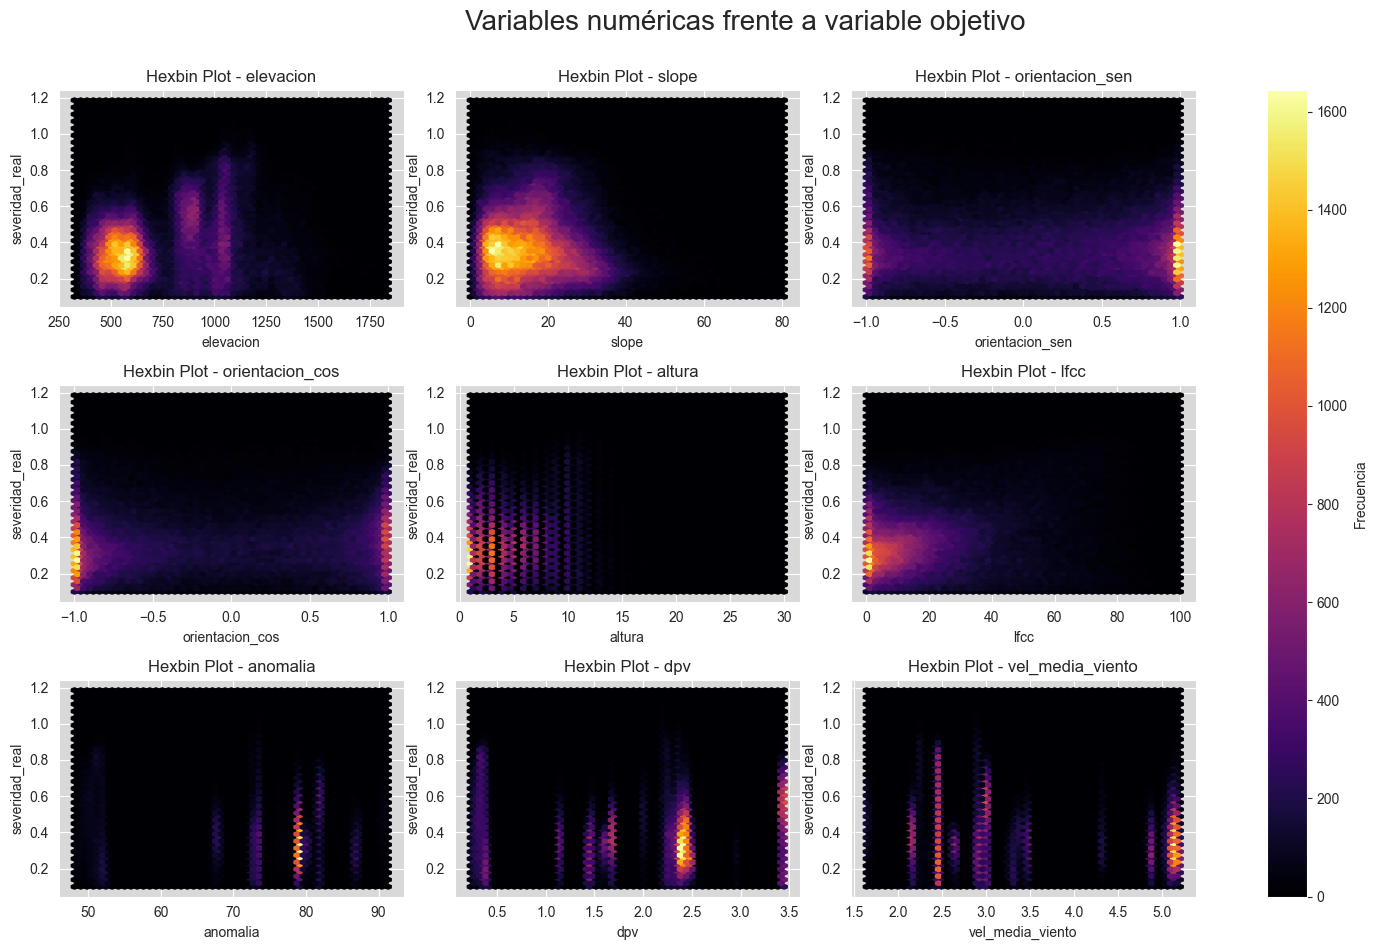

In [29]:
sns.set_style("darkgrid", {"axes.facecolor": ".85"})
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))
for index, var in enumerate(numerical_variables):
    row = index // ncols
    column = index % ncols
    im = axs[row][column].hexbin(df[var], df[target_real], gridsize=50, cmap='inferno')
    axs[row][column].set_xlabel(var)
    axs[row][column].set_ylabel(target_real)
    axs[row][column].set_title(f'Hexbin Plot - {var}')

plt.tight_layout()
fig.colorbar(im, ax=axs.ravel().tolist(), label='Frecuencia')
plt.suptitle('Variables numéricas frente a variable objetivo', fontsize=20, y=1.05)

plt.show()

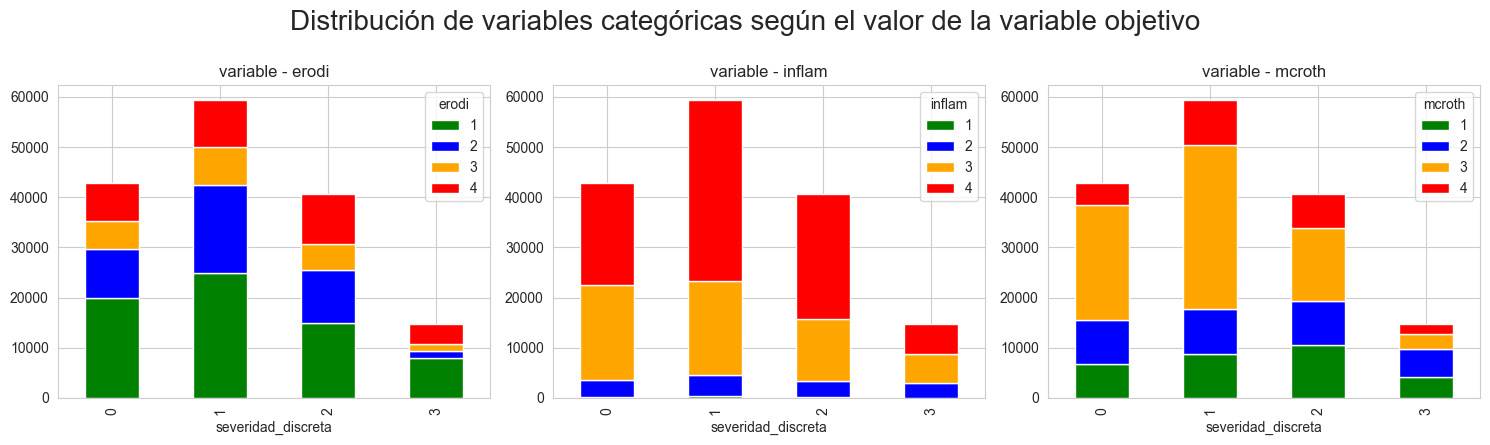

In [30]:
sns.set_style("whitegrid")
color_dict = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'red'}
nrows, ncols = 1, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
for index, var in enumerate(categorical_variables):
    row = index // ncols
    column = index % ncols
    grouped = df.groupby([target_discrete, var], observed=True).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=axs[index], color=color_dict)

    axs[column].set_xlabel(target_discrete)
    axs[column].set_title(f'variable - {var}')

plt.tight_layout()
plt.suptitle('Distribución de variables categóricas según el valor de la variable objetivo', fontsize=20, y=1.1)
plt.show()

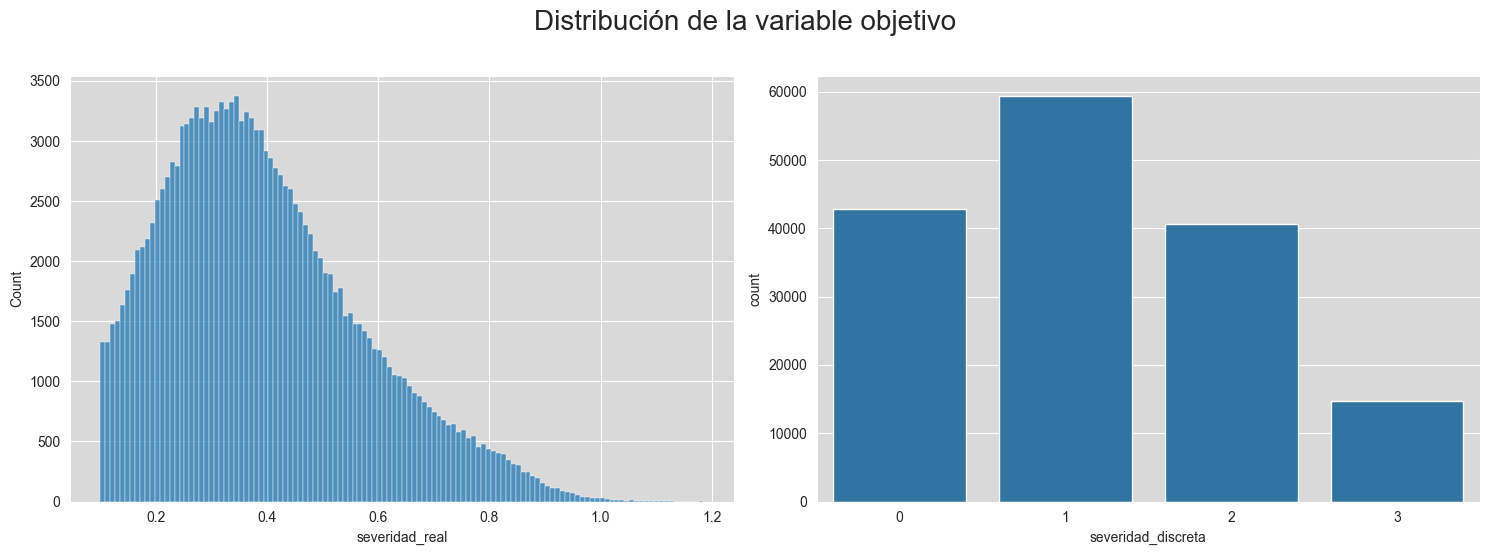

In [31]:
sns.set_style("darkgrid", {"axes.facecolor": ".85"})
nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

sns.histplot(data=df, x=target_real, ax=axs[0])
sns.countplot(data=df, x=target_discrete, ax=axs[1])

plt.tight_layout()
plt.suptitle('Distribución de la variable objetivo', fontsize=20, y=1.1)
plt.show()